# Investor - Flow of Funds - US

### Introduction:

Special thanks to: https://github.com/rgrp for sharing the dataset.

### Step 1. Import the necessary libraries

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv). 

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv')

### Step 3. Assign it to a variable called df

In [47]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             44 non-null     object
 1   Total Equity     44 non-null     int64 
 2   Domestic Equity  44 non-null     int64 
 3   World Equity     44 non-null     int64 
 4   Hybrid           44 non-null     int64 
 5   Total Bond       44 non-null     int64 
 6   Taxable Bond     44 non-null     int64 
 7   Municipal Bond   44 non-null     int64 
 8   Total            44 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.2+ KB


In [49]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             44 non-null     datetime64[ns]
 1   Total Equity     44 non-null     int64         
 2   Domestic Equity  44 non-null     int64         
 3   World Equity     44 non-null     int64         
 4   Hybrid           44 non-null     int64         
 5   Total Bond       44 non-null     int64         
 6   Taxable Bond     44 non-null     int64         
 7   Municipal Bond   44 non-null     int64         
 8   Total            44 non-null     int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 3.2 KB


### Step 4.  What is the frequency of the dataset?

In [52]:
df.set_index('Date',inplace=True, drop=True)

In [53]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [54]:
print(pd.infer_freq(df)) 
#No existe una frecuencia probable en el índice(DateTime)

None


In [55]:
df.index.to_series().diff().min

<bound method Series.min of Date
2012-12-05        NaT
2012-12-12     7 days
2012-12-19     7 days
2012-12-26     7 days
2013-01-02     7 days
2013-01-09     7 days
2014-04-02   448 days
2014-04-09     7 days
2014-04-16     7 days
2014-04-23     7 days
2014-04-30     7 days
2014-05-07     7 days
2014-05-14     7 days
2014-05-21     7 days
2014-05-28     7 days
2014-06-04     7 days
2014-06-11     7 days
2014-06-18     7 days
2014-06-25     7 days
2014-07-02     7 days
2014-07-09     7 days
2014-07-30    21 days
2014-08-06     7 days
2014-08-13     7 days
2014-08-20     7 days
2014-08-27     7 days
2014-09-03     7 days
2014-09-10     7 days
2014-11-05    56 days
2014-11-12     7 days
2014-11-19     7 days
2014-11-25     6 days
2015-01-07    43 days
2015-01-14     7 days
2015-01-21     7 days
2015-01-28     7 days
2015-02-04     7 days
2015-02-11     7 days
2015-03-04    21 days
2015-03-11     7 days
2015-03-18     7 days
2015-03-25     7 days
2015-04-01     7 days
2015-04-08     7 days

In [56]:
#Tambien se puede cambiar directamente el tipo_Dato dtype  del indice de Object ==> datetime64
pd.to_datetime(df.index)

DatetimeIndex(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26',
               '2013-01-02', '2013-01-09', '2014-04-02', '2014-04-09',
               '2014-04-16', '2014-04-23', '2014-04-30', '2014-05-07',
               '2014-05-14', '2014-05-21', '2014-05-28', '2014-06-04',
               '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
               '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13',
               '2014-08-20', '2014-08-27', '2014-09-03', '2014-09-10',
               '2014-11-05', '2014-11-12', '2014-11-19', '2014-11-25',
               '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28',
               '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
               '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

#### Se observa que inicialmente las frecuencias de las fechas son de 7días ==> 1semana, pero existen saltos de registros/filas de una/varias semanas que no aparecen en el DataFrame

### Step 5. Set the column Date as the index.

In [16]:
df.index

DatetimeIndex(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26',
               '2013-01-02', '2013-01-09', '2014-04-02', '2014-04-09',
               '2014-04-16', '2014-04-23', '2014-04-30', '2014-05-07',
               '2014-05-14', '2014-05-21', '2014-05-28', '2014-06-04',
               '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
               '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13',
               '2014-08-20', '2014-08-27', '2014-09-03', '2014-09-10',
               '2014-11-05', '2014-11-12', '2014-11-19', '2014-11-25',
               '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28',
               '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
               '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Step 6. What is the type of the index?

In [17]:
df.index

DatetimeIndex(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26',
               '2013-01-02', '2013-01-09', '2014-04-02', '2014-04-09',
               '2014-04-16', '2014-04-23', '2014-04-30', '2014-05-07',
               '2014-05-14', '2014-05-21', '2014-05-28', '2014-06-04',
               '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
               '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13',
               '2014-08-20', '2014-08-27', '2014-09-03', '2014-09-10',
               '2014-11-05', '2014-11-12', '2014-11-19', '2014-11-25',
               '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28',
               '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
               '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Step 7. Set the index to a DatetimeIndex type

In [57]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Step 9. You will notice that it filled the dataFrame with months that don't have any data with zeros. Let's drop these rows.

In [94]:
df_monthly = df.resample('M').sum()
df_monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


In [ ]:
# Teacher solution
df_month = df_monthly[~(df_monthly==0).all(axis=1)]
# que localice cuando en el dataframe NO es igual a 'cero', 'all' toda la fial 

In [95]:
df_monthly = df_monthly[df_monthly != 0]

In [96]:
df_monthly.dropna(axis=0, inplace=True)

In [97]:
df_monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-04-30,10842.0,1048.0,9794.0,4931.0,8493.0,7193.0,1300.0,24267.0
2014-05-31,-2203.0,-8720.0,6518.0,3172.0,13767.0,10192.0,3576.0,14736.0
2014-06-30,2319.0,-6546.0,8865.0,4588.0,9715.0,7551.0,2163.0,16621.0
2014-07-31,-7051.0,-11128.0,4078.0,2666.0,7506.0,7026.0,481.0,3122.0
2014-08-31,1943.0,-5508.0,7452.0,1885.0,1897.0,-1013.0,2910.0,5723.0
2014-09-30,-2767.0,-6596.0,3829.0,1599.0,3984.0,2479.0,1504.0,2816.0
2014-11-30,-2753.0,-7239.0,4485.0,729.0,14528.0,11566.0,2962.0,12502.0


In [98]:
df_monthly.shape

(13, 8)

In [78]:
pd.date_range(df.index[0], df.index[-1], freq='W-THU')

DatetimeIndex(['2012-12-06', '2012-12-13', '2012-12-20', '2012-12-27',
               '2013-01-03', '2013-01-10', '2013-01-17', '2013-01-24',
               '2013-01-31', '2013-02-07',
               ...
               '2015-01-29', '2015-02-05', '2015-02-12', '2015-02-19',
               '2015-02-26', '2015-03-05', '2015-03-12', '2015-03-19',
               '2015-03-26', '2015-04-02'],
              dtype='datetime64[ns]', length=122, freq='W-THU')

### Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [79]:
yearly_df = df.resample('Y')
yearly_df.sum()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


### BONUS: Create your own question and answer it.

#### Dibuja gráfica de la tendencia mensualmente de 'Domestic Equity' (Renta variable nacional)

In [99]:
df_monthly = df.resample('M').mean()['Domestic Equity']

In [100]:
df_monthly.dropna(axis=0, inplace=True)
df_monthly

Date
2012-12-31   -5781.500000
2013-01-31    -813.500000
2014-04-30     209.600000
2014-05-31   -2180.000000
2014-06-30   -1636.500000
2014-07-31   -3709.333333
2014-08-31   -1377.000000
2014-09-30   -3298.000000
2014-11-30   -1809.750000
2015-01-31    -291.000000
2015-02-28    1754.500000
2015-03-31   -2044.000000
2015-04-30   -2314.000000
Name: Domestic Equity, dtype: float64

In [101]:
df_monthly

Date
2012-12-31   -5781.500000
2013-01-31    -813.500000
2014-04-30     209.600000
2014-05-31   -2180.000000
2014-06-30   -1636.500000
2014-07-31   -3709.333333
2014-08-31   -1377.000000
2014-09-30   -3298.000000
2014-11-30   -1809.750000
2015-01-31    -291.000000
2015-02-28    1754.500000
2015-03-31   -2044.000000
2015-04-30   -2314.000000
Name: Domestic Equity, dtype: float64

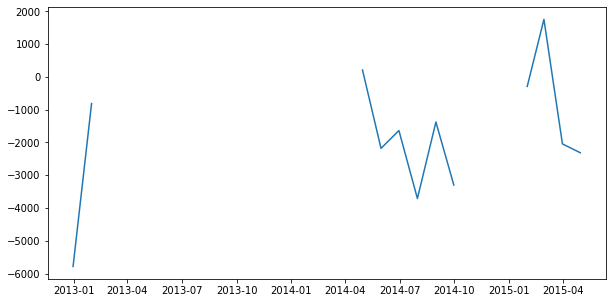

In [102]:
plt.figure(figsize=(10,5))
plt.plot(monthly_df['Domestic Equity'])